# 1. Import required libraries and read the dataset

In [143]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pickle


In [144]:
# Reading the dataset
data_set="./data/loan_approval_data.csv"
df = pd.read_csv(data_set)


In [145]:
# Displaying the first few rows of the dataset
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


 # 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [146]:
# Checking the shape of the dataset
print("Shape of dataset:")
df.shape


Shape of dataset:


(614, 13)

In [147]:

# Info to check data types and null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [148]:
# Display first few rows
df.head()


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


# 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features

In [149]:
df.isnull().sum()


loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [150]:
# Since here gender needs to be treated first, let us clean the data set as follows:
data_cleaned = df[df['gender'] != 'NA']


In [151]:
df_new = data_cleaned.dropna(subset=['gender'])

In [152]:
df_new.isnull().sum()


loan_id               0
gender                0
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       49
property_area         0
loan_status           0
dtype: int64

In [153]:
df_new = df_new.dropna(subset=['married', 'dependents', 'self_employed', 'loanamount', 'loan_amount_term'])

In [154]:
df_new.isnull().sum()


loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount            0
loan_amount_term      0
credit_history       43
property_area         0
loan_status           0
dtype: int64

In [155]:
df_new = df_new.drop_duplicates()


In [156]:
df_new.shape


(523, 13)

In [157]:
df_new.dtypes


loan_id               object
gender                object
married               object
dependents           float64
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [158]:
new_data_set = "./data/cleaned_loan_data.csv"
df_new.to_csv(new_data_set)


In [159]:
df_new.head()


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
5,lp001011,male,yes,2.0,graduate,yes,5417,4196.0,267.0,360.0,1.0,urban,y


In [160]:
# Dropping redundant or irrelevant columns if any
df_new.drop(columns=['loan_id'], inplace=True)

In [161]:
# Verify if missing values are handled
print(df_new.isnull().sum())

gender                0
married               0
dependents            0
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount            0
loan_amount_term      0
credit_history       43
property_area         0
loan_status           0
dtype: int64


In [162]:
df_new = df_new.dropna(subset=['credit_history'])


In [163]:
print(df_new.isnull().sum())


gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64


In [164]:
print(df_new.shape)

(480, 12)


In [165]:
new_data_set = "./data/new_loan_data.csv"
df_new.to_csv(new_data_set)

# 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations


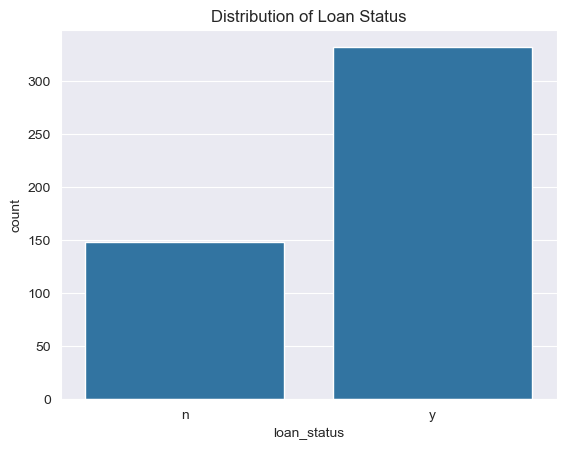

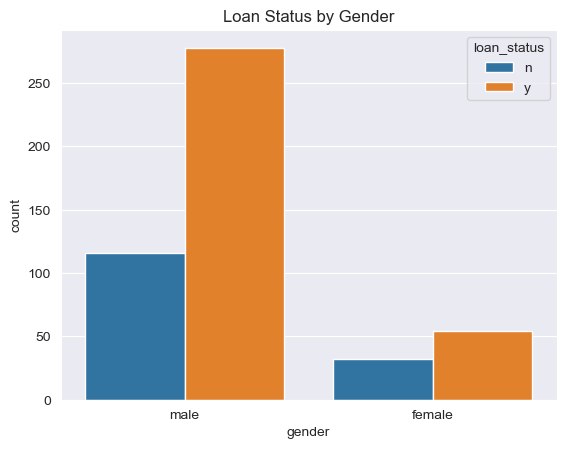

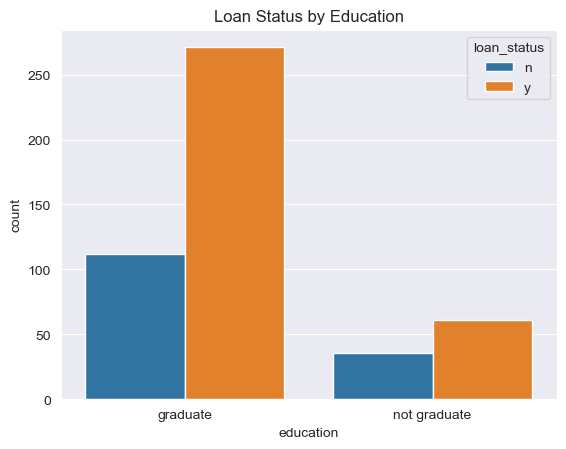

In [166]:
# Visualizing the distribution of loan status with respect to categorical features
sns.countplot(data=df_new, x='loan_status')
plt.title('Distribution of Loan Status')
plt.show()

# Observing Loan Status based on different features
sns.countplot(data=df_new, x='gender', hue='loan_status')
plt.title('Loan Status by Gender')
plt.show()

sns.countplot(data=df_new, x='education', hue='loan_status')
plt.title('Loan Status by Education')
plt.show()

# Further visualizations can be done similarly.


In [167]:
df_new = pd.read_csv('./data/new_loan_data.csv')

In [168]:
df_new.shape

(480, 13)

# 5. Encode the categorical data

In [169]:
# Using LabelEncoder to encode categorical variables
le = LabelEncoder()

# Encoding categorical columns
df_new.loc[:, 'gender'] = le.fit_transform(df_new['gender'])
df_new.loc[:, 'married'] = le.fit_transform(df_new['married'])
df_new.loc[:, 'self_employed'] = le.fit_transform(df_new['self_employed'])
df_new.loc[:, 'education'] = le.fit_transform(df_new['education'])
df_new.loc[:, 'credit_history'] = le.fit_transform(df_new['credit_history'])
df_new.loc[:, 'property_area'] = le.fit_transform(df_new['property_area'])
#df_new.loc[:, 'loan_status'] = le.fit_transform(df_new['loan_status'])

# Check the encoded dataset
df.head()


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [170]:
df_new.dtypes

Unnamed: 0             int64
gender                object
married               object
dependents           float64
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

# 6. Separate the target and independent features and split the data into train and test

In [171]:
df_new = df_new.reset_index(drop=True)

In [172]:
df_new.head()

,Unnamed: 0,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,n
1,2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,y
2,3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,y
3,4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,y
4,5,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2,y


In [173]:
df_new = df_new.drop(columns=['Unnamed: 0'])

In [174]:
df_new.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,n
1,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,y
2,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,y
3,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,y
4,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2,y


In [175]:
df_new.shape

(480, 12)

In [176]:
# Separating features (independent variables) and target (dependent variable)
X = df_new.drop(columns=['loan_status'])
y = df_new['loan_status']

In [177]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [178]:
# Check the shapes of train and test sets
print(X_train.shape, X_test.shape)

(384, 11) (96, 11)


# 7. Build any classification model to predict the loan status of the customer and save your model using pickle

In [179]:
X_train.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
374,1,1,3.0,1,0,3095,0.0,113.0,360.0,1.0,0
264,0,0,0.0,0,0,2378,0.0,46.0,360.0,1.0,0
235,0,1,1.0,0,0,4666,0.0,135.0,360.0,1.0,2
200,0,0,3.0,0,0,3083,0.0,255.0,360.0,1.0,0
213,1,1,0.0,0,0,11146,0.0,136.0,360.0,1.0,2


In [180]:
y_train.head()

374    y
264    n
235    y
200    y
213    y
Name: loan_status, dtype: object

In [181]:
# Assuming 'Loan_Status' is the target variable
print(y_train.unique())  # Check unique values in the target column


['y' 'n']


In [182]:
# Build a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=10, random_state=0)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=0)

In [183]:
# Evaluate the model
print(f"Accuracy on test set: {model.score(X_test, y_test)}")

Accuracy on test set: 0.7083333333333334


In [185]:
# Saving the trained model using pickle
loan_model = "./models/loan_eligibility_model.pkl"
with open(loan_model, 'wb') as file:
    pickle.dump(model, file)
file.close()
print("Model saved successfully!")


Model saved successfully!
